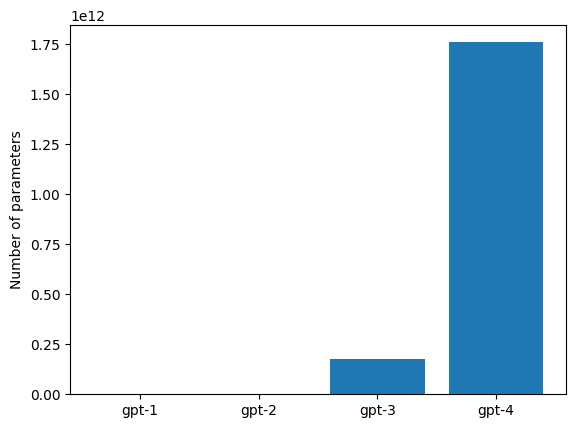

In [4]:
gpt_model_parameters = {"gpt-1": 117000000, "gpt-2": 1500000000, "gpt-3":175000000000, "gpt-4":1760000000000}
# plot this dictionary as a bar chart
import matplotlib.pyplot as plt
plt.bar(gpt_model_parameters.keys(), gpt_model_parameters.values())
plt.ylabel("Number of parameters")
plt.show()


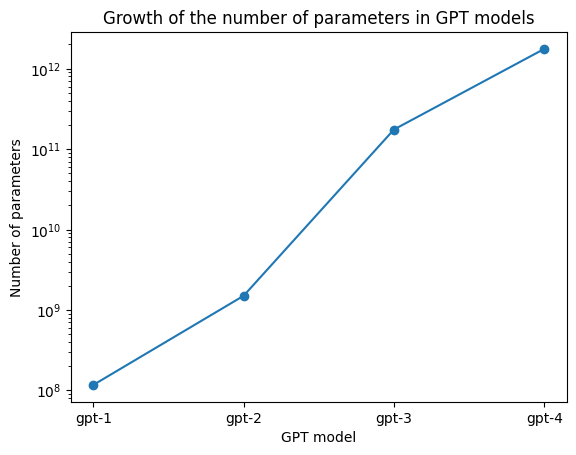

In [7]:
# Show that the growth of the number of parameters is exponential, and make the plot look nice
import numpy as np
x = np.arange(1, 5)
y = [gpt_model_parameters[f"gpt-{i}"] for i in x]
plt.plot(x, y, marker="o")
plt.yscale("log")
plt.ylabel("Log number of parameters")
plt.xlabel("GPT model")
plt.xticks(x, [f"gpt-{i}" for i in x])
plt.title("Growth of the number of parameters in GPT models")
plt.show()


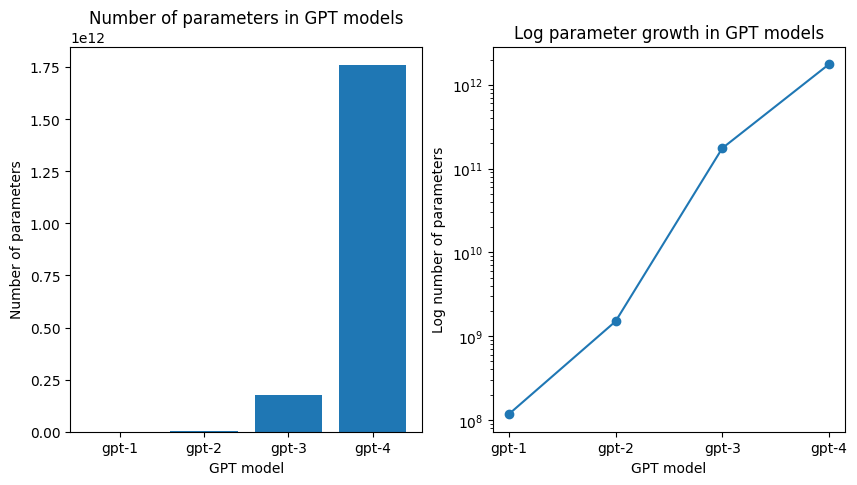

In [9]:
# Set the previous two plots up side by side ands make them look nice
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].bar(gpt_model_parameters.keys(), gpt_model_parameters.values())
axs[0].set_ylabel("Number of parameters")
axs[0].set_xlabel("GPT model")
axs[0].set_title("Number of parameters in GPT models")
axs[1].plot(x, y, marker="o")
axs[1].set_yscale("log")
axs[1].set_ylabel("Log number of parameters")
axs[1].set_xlabel("GPT model")
axs[1].set_xticks(x)
axs[1].set_xticklabels([f"gpt-{i}" for i in x])
axs[1].set_title("Log parameter growth in GPT models")
plt.show()


{'gpt-1': 117000000, 'gpt-2': 1500000000, 'gpt-3': 175000000000, 'gpt-4': 1760000000000, 'gpt-5': 44106.493966443566}


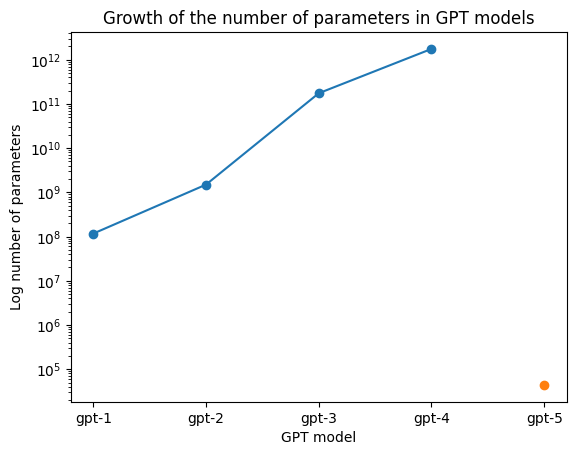

In [13]:
# Estimate the number of parameters for GPT-5 based on the data for the previous models
gpt_model_parameters = {"gpt-1": 117000000, "gpt-2": 1500000000, "gpt-3":175000000000, "gpt-4":1760000000000}
x = np.arange(1, 5)
y = [gpt_model_parameters[f"gpt-{i}"] for i in x]

from scipy.optimize import curve_fit
def exponential(x, a, b):
    return a * np.exp(b * x)




popt, _ = curve_fit(exponential, x, y)
gpt_model_parameters["gpt-5"] = exponential(5, *popt)
print(gpt_model_parameters)
plt.plot(x, y, marker="o")
plt.plot(5, gpt_model_parameters["gpt-5"], marker="o")
plt.yscale("log")
plt.ylabel("Log number of parameters")
plt.xlabel("GPT model")
plt.xticks(np.append(x, 5), [f"gpt-{i}" for i in np.append(x, 5)])
plt.title("Growth of the number of parameters in GPT models")
plt.show()


{'gpt-1': 117000000, 'gpt-2': 1500000000, 'gpt-3': 175000000000, 'gpt-4': 1760000000000, 'gpt-5': 68067337885992.53}


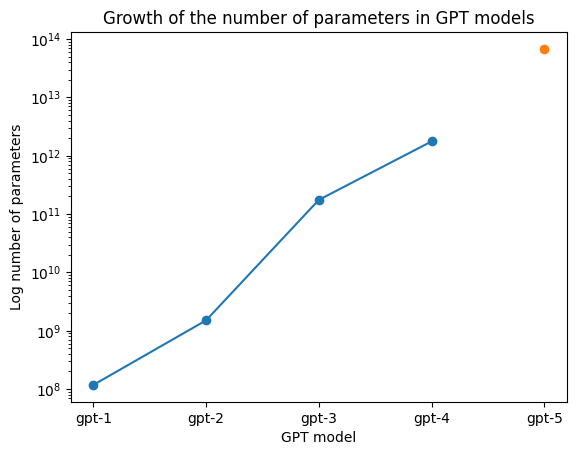

In [14]:
# The above is obviously wrong, as GPT-5 should be bigger than GPT-4.
# Let's try to fit a linear model to the log of the number of parameters
def linear(x, a, b):
    return a * x + b

popt, _ = curve_fit(linear, x, np.log(y))
gpt_model_parameters["gpt-5"] = np.exp(linear(5, *popt))
print(gpt_model_parameters)
plt.plot(x, y, marker="o")
plt.plot(5, gpt_model_parameters["gpt-5"], marker="o")
plt.yscale("log")
plt.ylabel("Log number of parameters")
plt.xlabel("GPT model")
plt.xticks(np.append(x, 5), [f"gpt-{i}" for i in np.append(x, 5)])
plt.title("Growth of the number of parameters in GPT models")
plt.show()


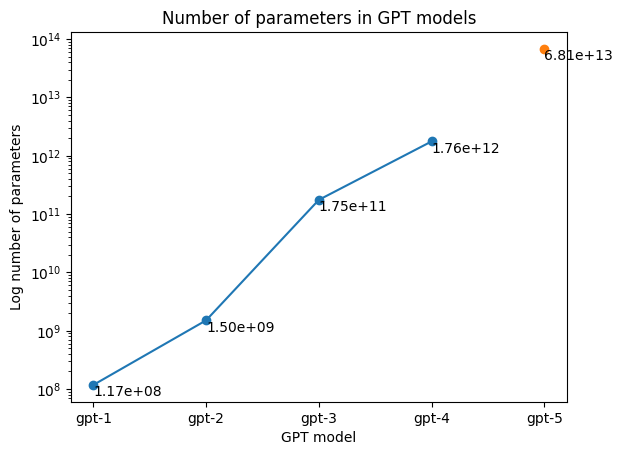

In [20]:
# Show the same plot as above, but with the number of parameters written on the points in scientific notation
plt.plot(x, y, marker="o")
plt.plot(5, gpt_model_parameters["gpt-5"], marker="o")
plt.yscale("log")
plt.ylabel("Log number of parameters")
plt.xlabel("GPT model")
plt.xticks(np.append(x, 5), [f"gpt-{i}" for i in np.append(x, 5)])
plt.title("Number of parameters in GPT models")
for i in np.append(x, 5):
    plt.text(i, gpt_model_parameters[f"gpt-{i}"], f"{gpt_model_parameters[f'gpt-{i}']:.2e}", ha="left", va="top")
plt.show()




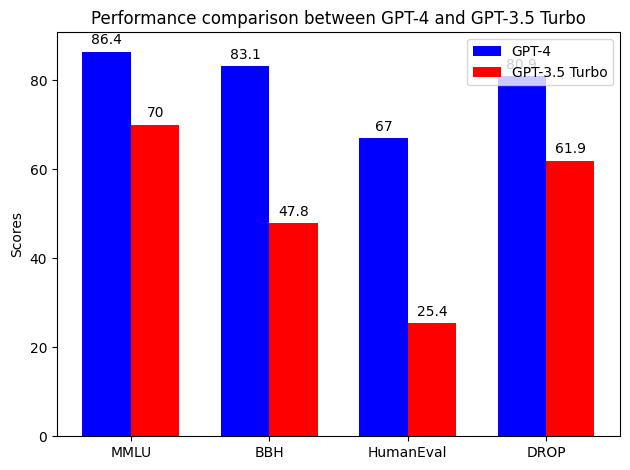

In [1]:
import matplotlib.pyplot as plt

# Benchmark names and scores for GPT-4 and GPT-3.5 Turbo
benchmarks = ['MMLU', 'BBH', 'HumanEval', 'DROP']
gpt4_scores = [86.4, 83.1, 67.0, 80.9]  # Scores of GPT-4
gpt35_scores = [70.0, 47.8, 25.4, 61.9]  # Scores of GPT-3.5 Turbo

x = range(len(benchmarks))  # the label locations

fig, ax = plt.subplots()
rects1 = ax.bar(x, gpt4_scores, width=0.35, label='GPT-4', color='b')
rects2 = ax.bar([p + 0.35 for p in x], gpt35_scores, width=0.35, label='GPT-3.5 Turbo', color='r')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Performance comparison between GPT-4 and GPT-3.5 Turbo')
ax.set_xticks([p + 0.35 / 2 for p in x])
ax.set_xticklabels(benchmarks)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.show()

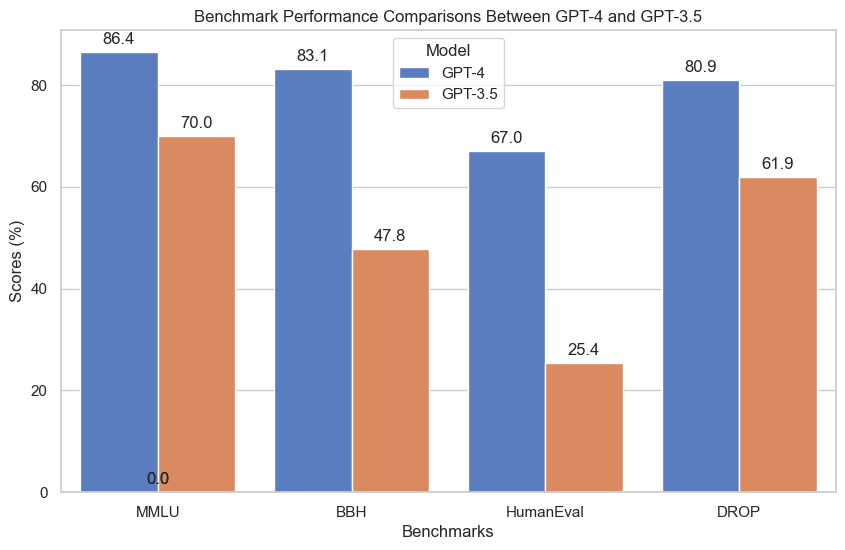

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Creating a DataFrame from the benchmark data
data = {
    'Benchmark': ['MMLU', 'BBH', 'HumanEval', 'DROP'] * 2,
    'Score': [86.4, 83.1, 67.0, 80.9, 70.0, 47.8, 25.4, 61.9],
    'Model': ['GPT-4']*4 + ['GPT-3.5']*4
}

df = pd.DataFrame(data)

# Plotting using seaborn to emulate ggplot2 style
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Benchmark', y='Score', hue='Model', data=df, palette='muted')
bar_plot.set_title('Benchmark Performance Comparisons Between GPT-4 and GPT-3.5')
bar_plot.set_ylabel('Scores (%)')
bar_plot.set_xlabel('Benchmarks')
plt.legend(title='Model')

# Display the values on the bars
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')

plt.show()


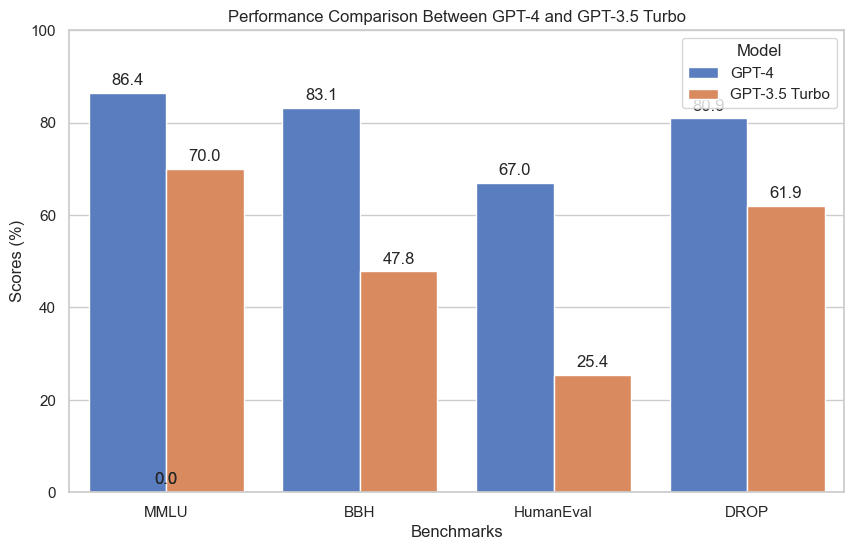

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Creating a DataFrame from the benchmark data
data = {
    'Benchmark': ['MMLU', 'BBH', 'HumanEval', 'DROP'] * 2,
    'Score': [86.4, 83.1, 67.0, 80.9, 70.0, 47.8, 25.4, 61.9],
    'Model': ['GPT-4']*4 + ['GPT-3.5 Turbo']*4
}

df = pd.DataFrame(data)

# Plotting using seaborn to emulate ggplot2 style
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Benchmark', y='Score', hue='Model', data=df, palette='muted')
bar_plot.set_title('Performance Comparison Between GPT-4 and GPT-3.5 Turbo')
bar_plot.set_ylabel('Scores (%)')
bar_plot.set_xlabel('Benchmarks')
plt.legend(title='Model')

# Set the y-axis limit to 100
bar_plot.set_ylim(0, 100)

# Display the values on the bars
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')

plt.show()


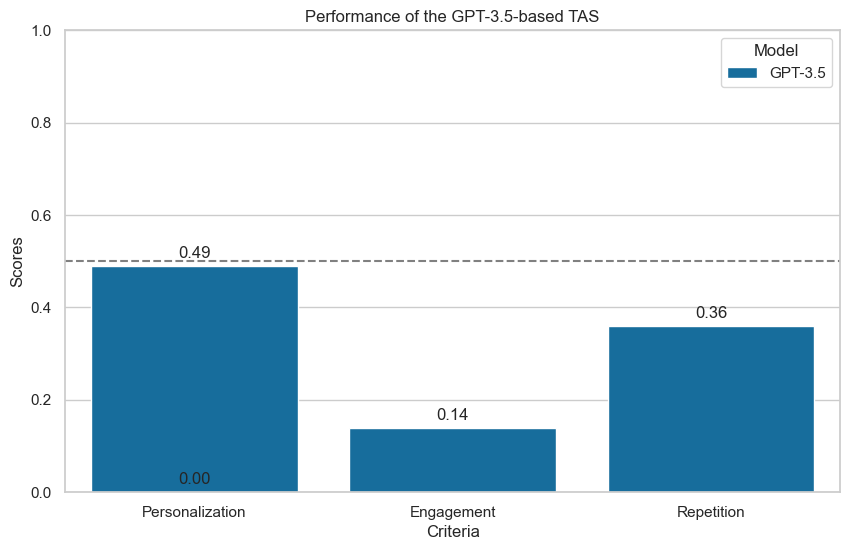

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Creating a DataFrame from the benchmark data
data = {
    'Criteria': ['Personalization', 'Engagement', 'Repetition'] * 1,
    'Score': [0.49, 0.14, 0.36],
    'Model': ['GPT-3.5']*3
}

df = pd.DataFrame(data)

palettes = [sns.color_palette("colorblind").as_hex()[0]]

# Plotting using seaborn to emulate ggplot2 style
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Criteria', y='Score', hue='Model', data=df, palette=palettes)
# Insert line at 0.5
plt.axhline(0.5, color='gray', linestyle='--')
bar_plot.set_title('Performance of the GPT-3.5-based TAS')
bar_plot.set_ylabel('Scores')
bar_plot.set_xlabel('Criteria')
plt.legend(title='Model')

# Set the y-axis limit to 100
bar_plot.set_ylim(0, 1)

# Display the values on the bars
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')

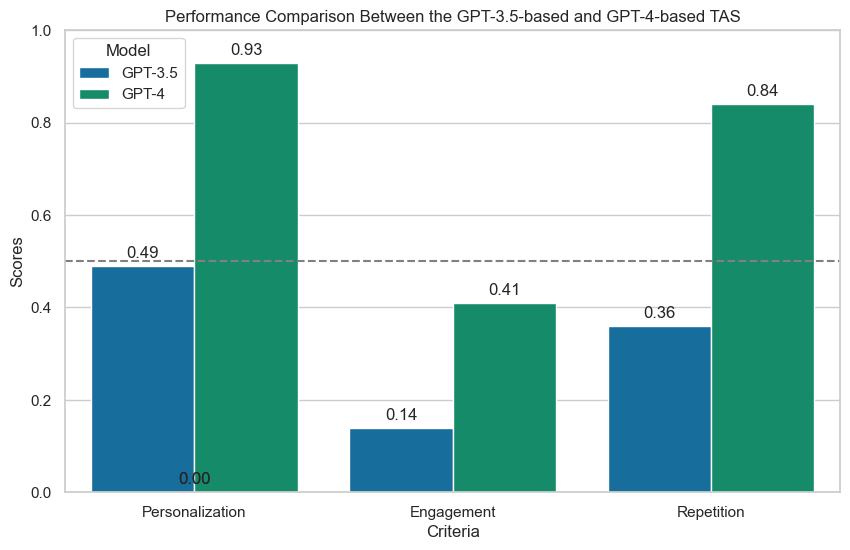

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Creating a DataFrame from the benchmark data
data = {
    'Criteria': ['Personalization', 'Engagement', 'Repetition'] * 2,
    'Score': [0.49, 0.14, 0.36, 0.93, 0.41, 0.84, ],
    'Model': ['GPT-3.5']*3 + ['GPT-4']*3 
}

df = pd.DataFrame(data)

palettes = [sns.color_palette("colorblind").as_hex()[0], sns.color_palette("colorblind").as_hex()[2]]

# Plotting using seaborn to emulate ggplot2 style
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
# bar_plot = sns.barplot(x='Criteria', y='Score', hue='Model', data=df, palette='muted')
bar_plot = sns.barplot(x='Criteria', y='Score', hue='Model', data=df, palette=palettes)
# Insert line at 0.5
plt.axhline(0.5, color='gray', linestyle='--')
bar_plot.set_title('Performance Comparison Between the GPT-3.5-based and GPT-4-based TAS')
bar_plot.set_ylabel('Scores')
bar_plot.set_xlabel('Criteria')
plt.legend(title='Model')

# Set the y-axis limit to 100
bar_plot.set_ylim(0, 1)

# Display the values on the bars
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')

plt.show()

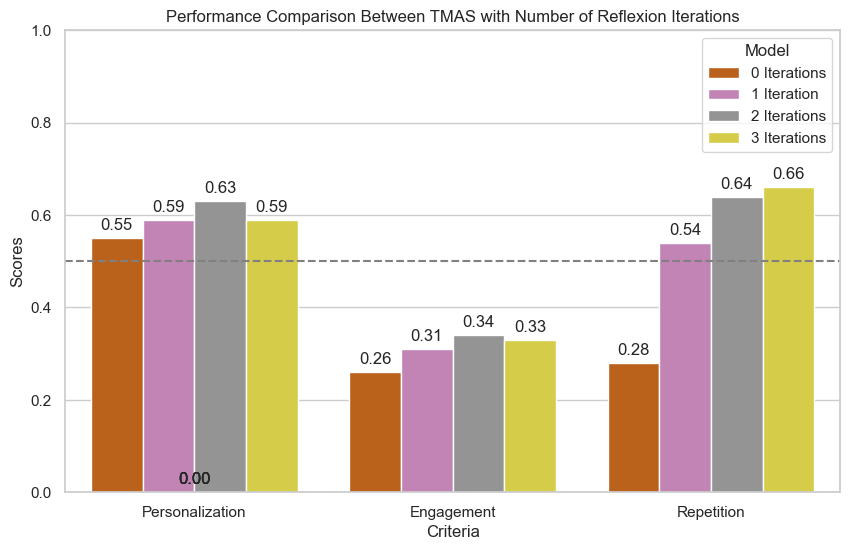

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Creating a DataFrame from the benchmark data
data = {
    'Criteria': ['Personalization', 'Engagement', 'Repetition'] * 4,
    'Score': [0.55, 0.26, 0.28, 0.59, 0.31, 0.54, 0.63, 0.34, 0.64, 0.59, 0.33, 0.66 ],
    'Model': ['0 Iterations']*3 + ['1 Iteration']*3 + ['2 Iterations']*3 + ['3 Iterations']*3
}

df = pd.DataFrame(data)

palettes = [sns.color_palette("colorblind").as_hex()[3],
            sns.color_palette("colorblind").as_hex()[4],
            sns.color_palette("colorblind").as_hex()[7],
            sns.color_palette("colorblind").as_hex()[8],]

# Plotting using seaborn to emulate ggplot2 style
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Criteria', y='Score', hue='Model', data=df, palette=palettes)
# Insert line at 0.5
plt.axhline(0.5, color='gray', linestyle='--')
bar_plot.set_title('Performance Comparison Between TMAS with Number of Reflexion Iterations')
bar_plot.set_ylabel('Scores')
bar_plot.set_xlabel('Criteria')
plt.legend(title='Model')

# Set the y-axis limit to 100
bar_plot.set_ylim(0, 1)

# Display the values on the bars
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')

plt.show()

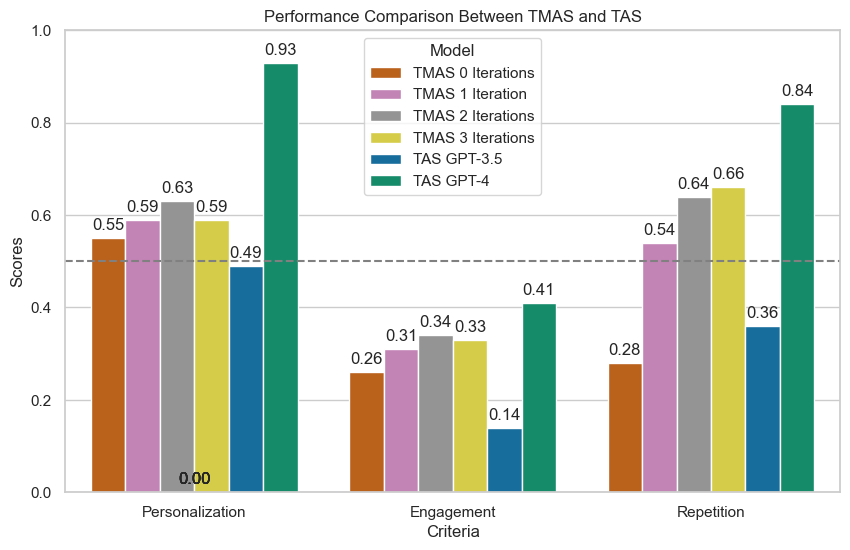

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Creating a DataFrame from the benchmark data
data = {
    'Criteria': ['Personalization', 'Engagement', 'Repetition'] * 6,
    'Score': [0.55, 0.26, 0.28, 0.59, 0.31, 0.54, 0.63, 0.34, 0.64, 0.59, 0.33, 0.66, 0.49, 0.14, 0.36, 0.93, 0.41, 0.84 ],
    'Model': ['TMAS 0 Iterations']*3 + ['TMAS 1 Iteration']*3 + ['TMAS 2 Iterations']*3 + ['TMAS 3 Iterations']*3 + ['TAS GPT-3.5']*3 + ['TAS GPT-4']*3 
}

df = pd.DataFrame(data)

palettes = [sns.color_palette("colorblind").as_hex()[3],
            sns.color_palette("colorblind").as_hex()[4],
            sns.color_palette("colorblind").as_hex()[7],
            sns.color_palette("colorblind").as_hex()[8],
            sns.color_palette("colorblind").as_hex()[0],
            sns.color_palette("colorblind").as_hex()[2]]

# Plotting using seaborn to emulate ggplot2 style
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Criteria', y='Score', hue='Model', data=df, palette=palettes)
# Insert line at 0.5
plt.axhline(0.5, color='gray', linestyle='--')
bar_plot.set_title('Performance Comparison Between TMAS and TAS')
bar_plot.set_ylabel('Scores')
bar_plot.set_xlabel('Criteria')
plt.legend(title='Model', loc='upper center')

# Set the y-axis limit to 100
bar_plot.set_ylim(0, 1)

# Display the values on the bars
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')

plt.show()

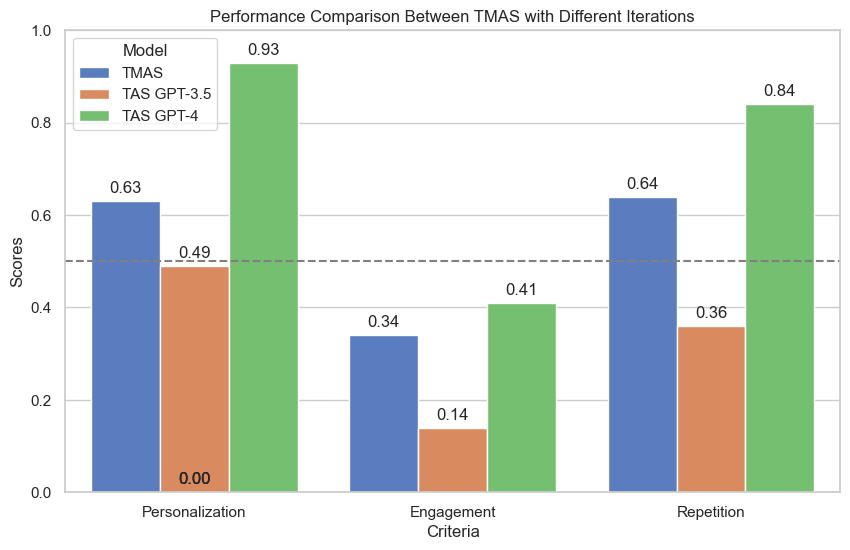

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Creating a DataFrame from the benchmark data
data = {
    'Criteria': ['Personalization', 'Engagement', 'Repetition'] * 3,
    'Score': [0.63, 0.34, 0.64, 0.49, 0.14, 0.36, 0.93, 0.41, 0.84 ],
    'Model': ['TMAS']*3 + ['TAS GPT-3.5']*3 + ['TAS GPT-4']*3 
}

df = pd.DataFrame(data)

# Plotting using seaborn to emulate ggplot2 style
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Criteria', y='Score', hue='Model', data=df, palette='muted')
# Insert line at 0.5
plt.axhline(0.5, color='gray', linestyle='--')
bar_plot.set_title('Performance Comparison Between TMAS with Different Iterations')
bar_plot.set_ylabel('Scores')
bar_plot.set_xlabel('Criteria')
plt.legend(title='Model')

# Set the y-axis limit to 100
bar_plot.set_ylim(0, 1)

# Display the values on the bars
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')

plt.show()

In [23]:
sns.color_palette("colorblind", 15).as_hex()

['#0173b2',
 '#de8f05',
 '#029e73',
 '#d55e00',
 '#cc78bc',
 '#ca9161',
 '#fbafe4',
 '#949494',
 '#ece133',
 '#56b4e9',
 '#0173b2',
 '#de8f05',
 '#029e73',
 '#d55e00',
 '#cc78bc']